# Number Representations

This treatment loosely follows the treatment in TAK, Chapter 2.

Mathematical topics covered:
* Integer representations in various bases, especially base 16 and base 2.
* Floating point numbers in various bases.

Programming concepts covered:
* converting to and from hexadecimal
* while loops
* floating point numbers
* special floating point numbers
* printing floating point numbers
* using `assert` for checking input
* catching errors with the `try` statement
* NumPy's higher precision `float128` type
* mpmath's multiple precision float type: `mpf`.

In Python a floating point real number is of type float. You can define a float using a number including a decimal. They are also the type of numbers that arise from (standard) division even if the quotient is an integer. You can test if a number is a float by evaluating its type, e.g., `type(num)`.

In [1]:
type(3.14)

float

In [2]:
type(2/1)

float

In [3]:
type(2//1)

int

In [4]:
from math import pi
type(pi)

float

Floats in Python are floating point numbers following the IEEE Floating Point Standards. We will learn what this means. First we should review numbers in other bases.

## Integer representations in various bases

Let $\beta \geq 2$ be an integer. Then we can represent each non-negative integer by a finite sequence of numbers in the set $\{0,1,2,\ldots,\beta-1\}$. Namely, if $(a_n,a_{n-1}, \ldots, a_0)$ is a finite sequence with each $a_i \in \{0,1,2,\ldots,\beta-1\}$, it represents the number
$$\sum_{k=0}^n a_k \beta^k.$$
Numbers are ordered like in decimal in order from most signficant to least significant. We usually assume that the most significant number in the sequence (i.e., $a_n$) is non-zero, but often in computers we allow zeros but limit the length of the sequence.

There some important special cases:
* Base 10 representations are said to be *decimal representations*.
* Base 2 representations are said to be *binary representations*.
* Base 16 representations are said to be *hexadecimal representations*. Often hexadecimal is abbreviated as *hex*.

**Examples**
The number $14$ has binary representation $1110$ since $14=8+4+2$.

In base 16, we represent the numbers $\{0,\ldots, 15\}$ by switching to letters once we run out of digits. So, we use
$$\{0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f\}$$
with $a=10$, $b=11$, $c=12$, $d=13$, $e=14$ and $f=15$. So for example, $415$ would be represented as `19f` since
$$415 = 1 \cdot (16)^2 + 9 \cdot 16 + 15.$$

## Working with hexadecimal numbers

Python has built in support for converting integers into hexadecimal through the `hex` function. Observe:

In [5]:
hex(12)

'0xc'

In [6]:
hex(415)

'0x19f'

In [7]:
hex(-43)

'-0x2b'

In [8]:
hex(0)

'0x0'

Note that the output of `hex` is a string. The first character is `-` if the number is negative, and then the subsequent two characters are `0x`. In the case of a non-negative number the first two characters are `0x`. The `0x` is there to indicate that we are dealing with a hexadecimal number.

Python also accepts integers input in hexadecimal as illustrated below.

In [9]:
0x25

37

In [10]:
-0x1f

-31

To convert a string holding a hexadecimal representation to an integer, you simply need to get Python to evaluate the string as input. This can be done with the `eval` command as shown below.

In [11]:
eval('0x24')

36

In [12]:
eval('-0xff')

-255

In particular, for any integer `n`, the operation `eval(hex(n))` returns `n`.

In [13]:
eval(hex(23))

23

## Working with binary numbers

Binary numbers can be worked with in a similar way to hexadecimal numbers. Python has a built in function `bin` which converts to binary. For example:

In [14]:
bin(11)

'0b1011'

The above output makes sense since $11=8+2+1$. The following checks the behavior of negative numbers and zero.

In [15]:
bin(-11)

'-0b1011'

In [16]:
bin(0)

'0b0'

Again, integers can be entered in binary.

In [17]:
0b1011

11

In [18]:
-0b1011

-11

In [19]:
eval("0b1011")

11

## Working with other bases

Python doesn't have a built in way to convert from an integer to other bases and back. We will do it by hand in base $3$, and learn some basic programming skills in the process.

A base $3$ is also called a *ternary representation*. Digits in ternary are known as *trits*. They take the value `0`, `1`, or `2`.

First lets discuss an example. Lets think about how we would find the ternary representation of $64$ as part of a repetitive process. 
* The rightmost trit of the ternary expansion of $64$ is `1`, because $64=3\times 21+1$. The remainder of the expansion coincides with the expansion of $21$.
* The rightmost trit of the expansion of $21$ is `0`, because $21$ is a multiple of three. In fact, $21=3 \times 7$, so the remainder of the expansion coincides with the expansion of $7$.
* The rightmost trit of the expansion of $7$ is `1`, because $7=3\times 2+1$. The remainder of the expansion coincides with the expansion of $2$.
* The rightmost trit of $2$ is `2`. Since $2=3 \times 0 + 2$, we can stop.

From the above we see that the ternary expansion of $64$ is `2101`. We have found the trits from right to left following the bullets above.

In particular observe that we can find the rightmost trit of a non-negative number using modular division by $3$. For example:

In [20]:
64 % 3

1

Note that we will want to output a string instead of an integer, so we will make use of the `str` function to convert an object or number to a string.

In [21]:
str(64 % 3)

'1'

This gives the right-most trit. The remainder of the trits give the ternary expansion of the number obtained through integer division by $3$. Namely,

In [22]:
64 // 3

21

We can implement this repetitive process using a while loop. A while loop has the syntax.

<pre style="background-color: light-grey">
while <em>condition</em>:
    <em>statement1</em>
    <em>statement2</em>
</pre>

The while command as above repeatedly runs the indented statements until condition becomes false. 

Here we make use of the while statement to carry out the above computation of the trits for $64$.

In [23]:
n = 64
while n != 0:  # Run the following loop until n becomes zero.
    trit = n % 3
    print("Found trit is '{}'.".format(trit))
    n = n // 3 # Update the value of n.
    print("Changed n to {}.".format(n))

Found trit is '1'.
Changed n to 21.
Found trit is '0'.
Changed n to 7.
Found trit is '1'.
Changed n to 2.
Found trit is '2'.
Changed n to 0.


Note that if `string` is a string containing `{}`, then `string.format(obj)` returns the string but with `{}` replaced by `str(obj)`. 

We have used print statements above to keep track of the values of the variables in the loop. We can see for instance when we order the trits from right to left, we get `2101`, which is what we wanted.

We can form `2101` by repeated concatenations of strings. We concatenate strings with the `+` operator. This was discussed earlier. For example `'abc'+'def'` will return `abcdef`.

Below, we take what we did above and include it in a function. We also perform the concatenation of trits using string concatenation.

In [24]:
def ternary(n):
    rep = '' # This will store the ternary representation.
    while n != 0:
        trit = n % 3
        rep = str(trit) + rep # add the new trit on the left.
        print("Our current representation is '{}'.".format(rep))
        n = n // 3
    return rep

In [25]:
ternary(64)

Our current representation is '1'.
Our current representation is '01'.
Our current representation is '101'.
Our current representation is '2101'.


'2101'

From the output above, we can see we have correctly concatenated. The output above `2101` is the ternary expansion of $64$ as desired.

It would be good to remove the print statement in the final version. But there are some other issues with the code.

What happens if $n$ is zero? What about if $n$ is negative?

In the negative case, $n$ will stay negative! This means our `while` loop will never terminate. I attempted to run it anyway and saw the following error:
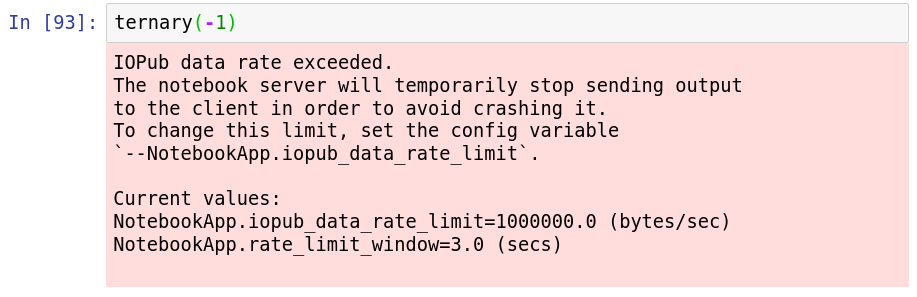

I had to go to the menu entry *Kernel > Interupt* to get execution to stop.

To avoid the possibility of this, we will test our input before entering the `while` loop. The `assert` statement is good for this. The syntax is 
<pre>assert <em>condition</em>, <em>error_string</em></pre>
The *error_string* is printed and execution is stopped if the *condition* is false. If *condition* is true, then execution continues unhindered and nothing is printed.

In [26]:
assert 1+1 == 2, "But, 1+1==2 should aways be true!"
print("I guess one plus one is two.")

I guess one plus one is two.


In [27]:
assert 1+1 == 3, "Error: 1+1 is not three!"
print("I guess one plus one is three.")

AssertionError: Error: 1+1 is not three!

We can check if `n` is an integer with the condition `type(n) == int` and check if `n` is positive with the condition `n >= 0`. Including corresponding assertions gives the following function:

In [28]:
def ternary(n):
    # Below we peform sanity checks on the input.
    assert type(n) == int, 'n must be an integer'
    assert n>0, 'n must be a positive integer.'

    rep = '' # This will store the ternary representation.
    while n != 0:
        trit = n % 3
        rep = str(trit) + rep # add the new trit on the left.
        n = n // 3 # Update the value of n.
    return rep

Here we test that it works.

In [29]:
ternary(64)

'2101'

In [30]:
ternary(5)

'12'

In [31]:
ternary('dog')

AssertionError: n must be an integer

In [32]:
ternary(-4)

AssertionError: n must be a positive integer.

Because Python supports arbitrarily large integers, our `ternary` function works with very large input.

In [33]:
print('2^100 is {}'.format(2**100))
print('2^100 in ternary is {}'.format(ternary(2**100)))

2^100 is 1267650600228229401496703205376
2^100 in ternary is 1002220101202122200001221110000110122001202012001102202211110221


Why would the ternary expansion be approximately twice as long as the decimal expansion?

## Floating point numbers

Let $\beta$ be a base, i.e., an integer greater than or equal to two. Then, just like in the decimal system every real number can be expressed as an infinite sum of the form
$$x = \pm \left(\sum_{k=-\infty}^0 a_k \beta^k\right) \times \beta^n,$$
where each $a_k \in \{0,1,\ldots, \beta-1\}$. We also assume that $a_0 \neq 0$ except in the case that $x=0$.

This representation of $x$ consists of a sign ($\pm 1$), the *mantissa* $\sum_{k=-\infty}^0 a_k \beta^k$ and the *exponent* $n$.

A simplified and not entirely correct description of a how a computer stores double precision floatting point numbers follows. Base $2$ is used, so data is stored in bits. The sign takes up one bit. Some number of bit say $K$ (often $K=52$) are used to store the mantissa, which then has the form $\sum_{k=-K}^0 a_k \beta^k$. Note that because $a_0=1$ (unless $x=0$), this bit does not need to be stored. Then some number of bits say $E$ (e.g., $E=11$) are used to store the exponent which means that roughly the exponent $n$ satisfies
$$-2^{E-1}+2 \leq n \leq 2^{E-1}-1.$$

Note that there are only $2^E-2$ values available for $n$, which leaves two values available for handling special values, including zero, infinity, and "not a number".

Large and small floating point numbers are printed in scientific notation.

In [34]:
from math import pi
pi * 10**50

3.1415926535897932e+50

Here the end `e+50` should interpretted as $\times 10^{50}$. This number is not exact. For example, even though $1/5$ has an exact representation in decimal as $0.2$, it does not have an exact representation as a float. This explains:

In [35]:
1/5 + 1/5 + 1/5 == 3/5

False

In [36]:
1/5 + 1/5 + 1/5

0.6000000000000001

**Remark.** The most important thing to take away from this discussion of floats is that rounding is performed in every step, and only rarely is a computation exact. It is important to be aware that errors can accumulate in repetitive computations.

If you want to understand the exact information representing your floating point number, you can use the `.hex()` method. For example:

In [37]:
x = -1/9
x.hex()

'-0x1.c71c71c71c71cp-4'

The `-0` in the font refers to the negative sign, and the exponent is `-4`. The mantissa in hex is `c71c71c71c71c`. To convert this number recall that `c` represents $12$. This means that 
$$x = - \left(1+
\frac{12}{16}+\frac{7}{(16)^2}+\frac{1}{(16)^3}+
\frac{12}{(16)^4}+\frac{7}{(16)^5}+\frac{1}{(16)^6}+
\frac{12}{(16)^7}+\frac{7}{(16)^8}+\frac{1}{(16)^9}+
\frac{12}{(16)^{10}}+\frac{7}{(16)^{11}}+\frac{1}{(16)^{12}}+
\frac{12}{(16)^{13}}
\right)2^{-4}.$$
Simplifying by pulling out a factor of $16^{-13}$, we see that
$$x = - \left(16^{13}+
12 \cdot 16^{12} + 7 \cdot 16^{11} + 1 \cdot 2^{10} +
12 \cdot 16^9 + 7 \cdot 16^8 + 1 \cdot 2^7 +
12 \cdot 16^6 + 7 \cdot 16^5 + 1 \cdot 2^4 +
12 \cdot 16^3 + 7 \cdot 16^2 + 1 \cdot 2^1 +
12\right)2^{-4} \cdot 16^{-13}.$$
Thus, we can get back our exact number as follows:

In [38]:
sign = -1
numerator = 16**13 + \
            12 * 16**12 + 7 * 16**11 + 1 * 16**10 + \
            12 * 16**9  + 7 * 16**8  + 1 * 16**7  + \
            12 * 16**6  + 7 * 16**5  + 1 * 16**4  + \
            12 * 16**3  + 7 * 16**2  + 1 * 16**1  + \
            12
denominator = 2**4 * 16**13
computed_x = sign * numerator / denominator
if x == computed_x:
    print("They are equal.")
else:
    print("They are not equal.")

They are equal.


**Remark**: The `\` at the end of a line indicates that Python should continue reading an expression on the next line. This allows us to make long expressions more readable.

A simpler way to get a floating point number as an exact fraction is to use the `.as_integer_ratio()` method.

In [39]:
x.as_integer_ratio()

(-2001599834386887, 18014398509481984)

This information agrees with what we computed for the numerator and denominator after canceling a common factor of four:

In [40]:
print(sign*numerator//4)
print(denominator//4)

-2001599834386887
18014398509481984


You can also convert from a hex representation back into a float. E.g.,

In [41]:
y = float.fromhex('-0x1.aaap+0')
y

-1.66650390625

### The `float_info` package

You can access some information about floating point numbers on your Python 3 instance using the `sys.float_info` package.

In [42]:
import sys

The largest number that can be stored as a float is `sys.float_info.max`.

In [43]:
print("The largest number in decimal is {:e}.".format(sys.float_info.max))
print("The largest number in hex is {}.".format(sys.float_info.max.hex()))

The largest number in decimal is 1.797693e+308.
The largest number in hex is 0x1.fffffffffffffp+1023.


(The format specifier `{:e}` tells python to print a number in exponential notation, and it prints fewer digits.)

The smallest positive number that can be stored *at full precision* is given by `sys.float_info.min`

In [44]:
print("The smallest positive number in decimal is {:e}." \
      .format(sys.float_info.min))
print("The largest positive number in hex is {}." \
      .format(sys.float_info.min.hex()))

The smallest positive number in decimal is 2.225074e-308.
The largest positive number in hex is 0x1.0000000000000p-1022.


This shows that the range of exponents is from $-1022$ to $+1023$. The reason I said "at full precision" above is that you can obtain smaller positive numbers (on my computer at least) at a loss of precision:

In [45]:
print("Dividing by two, we get {:e}.".format(sys.float_info.min / 2))
print("And in hex we get {}.".format((sys.float_info.min / 2).hex()))

Dividing by two, we get 1.112537e-308.
And in hex we get 0x0.8000000000000p-1022.


You can see the loss of precision because the mantissa begins with `0.` rather than `1.`.

In [46]:
float(2**1023).hex()

'0x1.0000000000000p+1023'

In [47]:
float(2**-1022).hex()

'0x1.0000000000000p-1022'

In [48]:
sys.float_info.epsilon.hex()

'0x1.0000000000000p-52'

The *machine unit*, $\epsilon$, is the smallest number that you can add to $1$ and still store (exactly) as a float. It can be obtained as `sys.float_info.epsilon`.

In [49]:
print("The machine unit is {:e} in decimal and {} in hex." \
      .format(sys.float_info.epsilon, sys.float_info.epsilon.hex()))

The machine unit is 2.220446e-16 in decimal and 0x1.0000000000000p-52 in hex.


(Above we used two format specifiers in one string. You can use as many as you want in this way.)

You can see why this is the smallest number by considering the hex representaion of $1+\epsilon$.

In [50]:
print("One plus the machine unit is {} in hex." \
      .format((1 + sys.float_info.epsilon).hex()))

One plus the machine unit is 0x1.0000000000001p+0 in hex.


### Special floats

Python has some special float values. Thise can be accessed using the `float` function which is built into python. (You can find out about it by typing `float?`.)

First surprisingly, it has two different values of zero:

In [51]:
pos_zero = float("+0")
pos_zero

0.0

In [52]:
neg_zero = float("-0")
neg_zero

-0.0

While they print differently, they are still ``equal''.

In [53]:
pos_zero == neg_zero

True

You can get negative zero by dividing negative number by a huge positive number. For example:

In [54]:
-1 / 2**5000

-0.0

There are similarly two versions of infinity.

In [55]:
pos_infinity = float("+Infinity")
pos_infinity

inf

In [56]:
neg_infinity = float("-Infinity")
neg_infinity

-inf

But, these are not equal:

In [57]:
pos_infinity == neg_infinity

False

There is also the value "not a number".

In [58]:
not_a_number = float("NaN")
not_a_number

nan

This notion corresponds to an "indeterminant form" in math. For example:

In [59]:
pos_infinity + neg_infinity

nan

In [60]:
pos_zero * pos_infinity

nan

## Exceptions:

An [`OverflowError`](https://docs.python.org/3/library/exceptions.html#OverflowError) should arise if a number exceeds the storable range. For example:

In [61]:
2.0**1300

OverflowError: (34, 'Numerical result out of range')

A `ZeroDivisionError` should arise when dividing by zero:

In [62]:
1/0

ZeroDivisionError: division by zero

A `try` and `except` statement can be used to handle errors, which otherwise stop your program from running. For example:

In [63]:
try:
    x = 1/0
except ZeroDivisionError as error:
    print("Well that failed with an error: {}".format(error))

Well that failed with an error: division by zero


For a more ellaborate example, we will start with $x = 2$ and keep squaring it until we see an overflow error. We will see how big $x$ is when it overflows.

In [64]:
x = 2.0
try:
    while True: # run until an error arises.
        x = x**2
except OverflowError:
    pass        # pass means do nothing
print("x is {:e} in decimal and {} in hex.".format(x, x.hex()))

x is 1.340781e+154 in decimal and 0x1.0000000000000p+512 in hex.


## More detail on printing floats:

We will briefly describe how to print floats in various formats. Please read LL &sect; 1.6.2 for more detail. You can also learn more in the [Python documentation](https://docs.python.org/3/library/string.html).

In [65]:
from math import pi

Print 3 places after the decimal:

In [66]:
"{:.3f}".format(pi)

'3.142'

Same, but pad with space so that it takes up 6 spaces:

In [67]:
"{:6.3f}".format(pi)

' 3.142'

Print the 5 most significant digits, in scientific notation if necessary:

In [68]:
"{:.5g}".format(pi)

'3.1416'

Pad to $7$ characters.

In [69]:
"{:7.5g}".format(pi)

' 3.1416'

The `e` format specifier indicates that it should always be printed in scientific notation. The following prints with $5$ digits after the decimal in scientific notation.

In [70]:
"{:.5e}".format(pi)

'3.14159e+00'

Note that `f` will not convert to scientific, while `g` will if necessary:

In [71]:
"{:.3f} = {:.3g}".format(pi*10**10,pi*10**100)

'31415926535.898 = 3.14e+100'

## Numpy floats

Numpy has a higher precision float type `numpy.float128`. There are also some lower precision float types. A list is availble in the [NumPy documentation](https://numpy.org/devdocs/user/basics.types.html).

In [72]:
import numpy as np

You can convert to this type by using `np.float64` as a function. E.g.,

In [73]:
x = np.float128(7)
type(x)

numpy.float128

You should be careful when converting to it. For example, this is the wrong way to compute $1/3$ as a `float128` since it first computes $1/3$ as a float and then converts it to a `float128`.

In [74]:
np.float128(1/3)

0.33333333333333331483

This would be better:

In [75]:
np.float128(1)/3

0.33333333333333333334

You can learn more about `float128` in the [NumPy documentation](https://numpy.org/devdocs/user/basics.types.html).

## The mpmath multiprecision library

There is also the [mpmath](http://mpmath.org/) package for arbitrary precision (meaning it gives as much bits of precision as you request). I describe some basics of using the library below. You may also want to see the  [basic usage section of the mpmath documentation](http://mpmath.org/doc/current/basics.html).

You can import the arbitrary precision library with:

In [76]:
from mpmath import mp

You can set the number of bits of precision as follows:

In [77]:
mp.prec = 4

Then you can represent $4/3$ like this:

In [78]:
x = mp.mpf(4)/3
x

mpf('1.375')

You can access the exponent and the mantissa

Here `mp` stands for multiple precision, and the `mpf` for multiple precision float.

We can see that this is representing $1 \frac{3}{8}$, which is the closest number to $4/3$ that can be represented with $4$ bits. Note that both $4$ and $3$ can be stored exactly, and the $3$ will be converted to a number with the same precision before dividing. At high precision, this is better than writing `mp.mpf(4/3)` since `4/3` will be computed as a float which is then converted to `mpf`, so this expression will not be any more accurate than a float.

The way numbers are stored is a bit different. You can access the details like this:

In [79]:
x.man_exp

(11, -3)

This tells you that the number stored is 
$$11 \times 2^{-3} = \frac{11}{8} = 1 \frac{3}{8}.$$
Here $11$ is the *mantissa* and $-3$ is the exponent. The exponent can store any integer (like Python 3's int type) while the size of the binary representation of the mantissa is limited by our choice of precision. Here $11$ can be written as $1011$ in binary. This is the four bits we need. Note however that the bit in the ones place should always be one (unless zero is stored) since otherwise the number is even and we can divide by $2$ and incorporate the factor of $2$ into the exponent. On the other hand, we also need a bit for stroring the sign.

A great thing about this is that even at $4$ bits of precision, there is no possibility of over or underflow.

In [80]:
y = mp.mpf(2)**(10**100)
y

mpf('2.552e+3010299956639811952137388947244930267681898814621085413104274611271081892744245094869272521181861720')

In [81]:
y.man_exp

(1,
 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000)

You could try to compute that with a float by typing `2.0**(10**100)`. You should get an `OverflowError`.

You can set the number of digits of precision instead of bits. This will change the number of bits of precision to match.

In [82]:
mp.dps = 50

Then you can access the first 50 digits of pi:

In [83]:
mp.pi()

mpf('3.1415926535897932384626433832795028841971693993751068')

There are also the usual functions for working with these numbers:

In [84]:
mp.sin(mp.pi()/3)

mpf('0.86602540378443864676372317075293618347140262690519051')